# Ether

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("../src/")

import read_files
import partition_energy
import spectral_density
import absorption
import utils

In [3]:
length = 100 #ps
dt = 10 #fs

LHII = read_files.all_LHII_data(f"{length}ps_{dt}fs")

In [4]:
ether_dat = np.concatenate((np.load("../data/ether_chl_xtb/excitation_energies_0_4999.npy"),
                      np.load("../data/ether_chl_xtb/excitation_energies_5000_9999.npy"))
)

In [5]:
b850a = list(range(0, 27, 3))
b800 = list(range(1, 27, 3))
b850b = list(range(2, 27, 3))

In [8]:
colors = {
    'ether' : 'black',
    'LHII' : 'red',
    'ring' : 'gray'
}

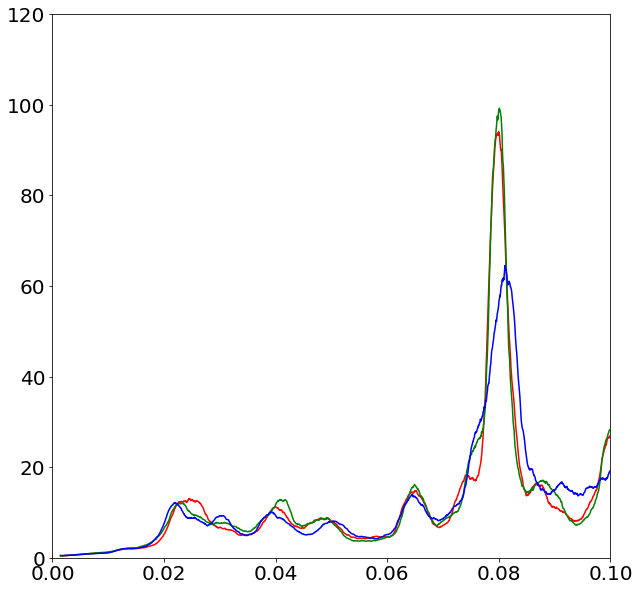

In [155]:
N = 700
N_eth = N
fig, ax = plt.subplots()

import matplotlib
font = {'size'   : 20}

matplotlib.rc('font', **font)

autocorr_eth, spectrum_eth, domain_eth = spectral_density.spectrum_and_domain((ether_dat - np.mean(ether_dat)) * Eh_to_eV, dt)

ax.set_xlim(0, 0.10)

def ring_spectra(indices):
    ring_spectra = []
    ring_domains = []

    for i in indices:
        #autocorr_LHII, spectrum_LHII, domain_LHII = spectral_density.spectrum_and_domain((LHII["site_e"][:,i] - np.mean(LHII["site_e"][:,i]))*Eh_to_eV, dt)
        autocorr_LHII, spectrum_LHII, domain_LHII = spectral_density.spectrum_and_domain((LHII["site_e"][:,i] - np.mean(LHII["site_e"][:,i]))*Eh_to_eV, dt)

        ring_spectra.append(utils.moving_average(utils.first_half(np.abs(spectrum_LHII)), N))
        ring_domains.append(utils.moving_average(utils.first_half(domain_LHII), N))


    return np.array(ring_spectra), np.array(ring_domains)
    
b850a_spectra, b850a_domains = ring_spectra(b850a)
b850b_spectra, b850b_domains = ring_spectra(b850b)
b800_spectra,  b800_domains  = ring_spectra(b800)
    

    
ax.set_ylim(0, 120)

avg_eth_domain = utils.moving_average(utils.first_half(domain_eth), N_eth)
avg_eth_spectrum = utils.moving_average(utils.first_half(np.abs(spectrum_eth)), N_eth)

#ax.plot(avg_eth_domain * per_fs_to_eV, avg_eth_spectrum * thermal_correction(avg_eth_domain) , color=colors['ether'])

ax.plot(np.mean(b850a_domains, axis=0) * per_fs_to_eV, np.mean(b850a_spectra, axis=0) * thermal_correction(np.mean(b850a_domains, axis=0)), color='red', alpha=1)
ax.plot(np.mean(b850b_domains, axis=0) * per_fs_to_eV, np.mean(b850b_spectra, axis=0) * thermal_correction(np.mean(b850b_domains, axis=0)), color='green', alpha=1)
ax.plot(np.mean(b800_domains,  axis=0) * per_fs_to_eV, np.mean(b800_spectra,  axis=0) * thermal_correction(np.mean(b800_domains,  axis=0)), color='blue', alpha=1)

fig.set_size_inches(10, 10)

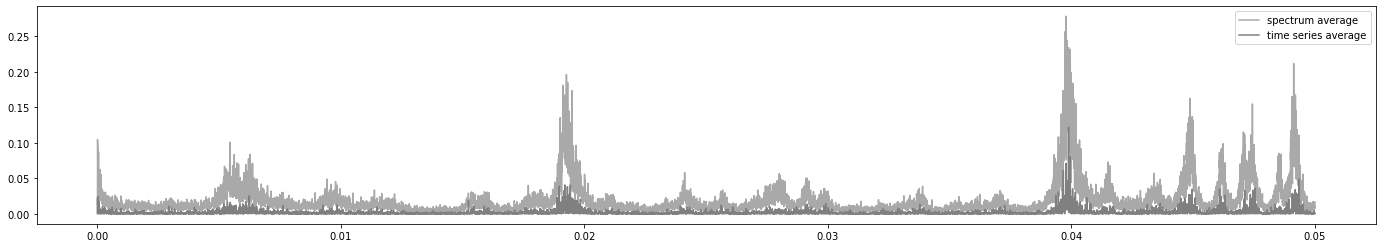

In [13]:
spectrum_res = np.zeros(49996)

domain = None

for i in b850a:
    autocorr_i, spectrum_i, domain_i = spectral_density.spectrum_and_domain(LHII["site_e"][:,i] - np.mean(LHII["site_e"][:,i]), 10)
    
    spectrum_res += utils.first_half(np.abs(spectrum_i))
    domain = utils.first_half(domain_i)
    
spectrum_res /= len(b850a)

fig, ax = plt.subplots()
ax.plot(domain, spectrum_res, color='darkgray')
ax.plot(utils.first_half(domain_ring), utils.first_half(np.abs(spectrum_ring)), color='gray')

ax.legend(['spectrum average', 'time series average'])
fig.set_size_inches(24, 4)